# HW1 Polynomial curve fitting

sample the function curve of $y=\sin(2\pi x)$ with Gaussian noise

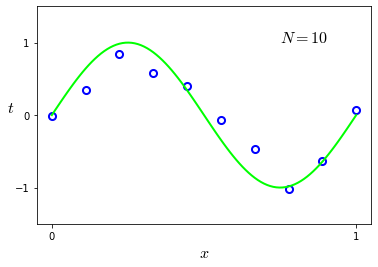

In [5]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt


x = np.linspace(0, 1, 10)
fn = lambda x: np.sin(2 * np.pi * x)
y = fn(x) + np.random.normal(0, 0.2, x.shape[0])

def init_fig():
    plt.cla()
    plt.xlim(-0.05, 1.05)
    plt.ylim(-1.5, 1.5)
    plt.xticks([0, 1])
    plt.yticks([-1, 0, 1])
    plt.xlabel(r"$x$", size=16, math_fontfamily="cm")
    plt.ylabel(r"$t$", size=16, math_fontfamily="cm", rotation="horizontal")

def draw_fn(fn, xlim, c='#00ff00', lw=2):
    x = np.linspace(xlim[0], xlim[1], 100)
    y = fn(x)
    plt.plot(x, y, c=c, lw=lw)

init_fig()
plt.scatter(x, y, s=200, c='#ffffff', marker='.', edgecolors='b', linewidths=2)
draw_fn(fn, [0, 1])
plt.text(0.75, 1, r"$N=10$", size=16, math_fontfamily="cm")
plt.show()


Polynomial curve fitting means using a polynomial function fitting given curve.
$$
\hat{y}(x_i,\mathbf{w}) = \sum_{j=0}^M w_j x_i^j
$$
For convenience, rewrite above equation in matrix form.
$$
\hat{Y} = \mathbf{X}\mathbf{w} = (\mathbf{x}_1, \dots, \mathbf{x}_N)\mathbf{w}
$$
where
$$
\mathbf{x}_i = (1, x_i^1, \dots, x_i^M)^T
$$

Then minimize least suqre to fit given function $y$.
$$
\min_{\mathbf{w}} \mathcal{L} = \frac{1}{2} ||\mathbf{X}\mathbf{w}-\mathbf{y}||^2
$$

Let the derivative of $\mathbf{w}$ equal to $0$
$$
\begin{aligned}
    \frac{\partial \mathcal{L}}{\partial \mathbf{w}}&=\frac{1}{2}\frac{\partial(\mathbf{w}^T\mathbf{X}^T\mathbf{X}\mathbf{w}-2\mathbf{w}^T\mathbf{X}^T\mathbf{y}-\mathbf{y}^T\mathbf{y})}{\partial \mathbf{w}} = 0 \\
    &\Rightarrow \mathbf{X}^T\mathbf{X}\mathbf{w}-\mathbf{X}^T\mathbf{y} = 0 \\
    &\Rightarrow \mathbf{w}=(\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{y} \\
\end{aligned}
$$

[ -0.14324866   9.19793827 -26.12092805  17.05937392]


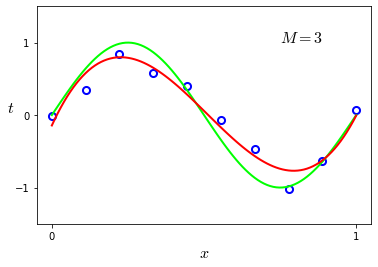

[-8.03111569e-03 -7.53605105e+01  1.74204579e+03 -1.49667295e+04
  6.74945805e+04 -1.78591274e+05  2.86862720e+05 -2.75103050e+05
  1.44788105e+05 -3.21509605e+04]


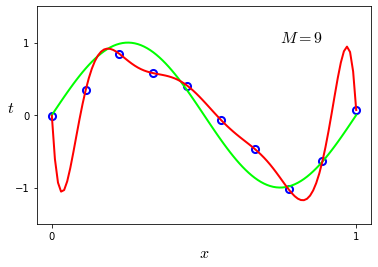

In [6]:
def poly_transform(x, degree):
    assert degree >= 0
    X = np.zeros([len(x), degree+1])
    for i in range(degree+1):
        X[:, i] = x ** i
    return X

def least_squre(X, y):
    yy = y.T
    return np.linalg.inv(X.T @ X) @ X.T @ yy

def poly_fit(x, y, degree):
    assert 0 <= degree < len(x)
    X = poly_transform(x, degree)
    w = least_squre(X, y)
    fn_fit = lambda x: poly_transform(x, degree) @ w
    return fn_fit, w

degree = 3
fn_fit, w = poly_fit(x, y, degree)
print(w)
init_fig()
plt.scatter(x, y, s=200, c='#ffffff', marker='.', edgecolors='b', linewidths=2)
draw_fn(fn, [0, 1])
draw_fn(fn_fit, [0, 1], c="#ff0000")
plt.text(0.75, 1, "$M={}$".format(degree), size=16, math_fontfamily="cm")
plt.show()

degree = 9
fn_fit, w = poly_fit(x, y, degree)
print(w)
init_fig()
plt.scatter(x, y, s=200, c='#ffffff', marker='.', edgecolors='b', linewidths=2)
draw_fn(fn, [0, 1])
draw_fn(fn_fit, [0, 1], c="#ff0000")
plt.text(0.75, 1, "$M={}$".format(degree), size=16, math_fontfamily="cm")
plt.show()

[-1.34345299e-01 -1.72403114e+01  7.79424548e+02 -8.17247973e+03
  4.08746804e+04 -1.14325599e+05  1.88031097e+05 -1.80586488e+05
  9.37336382e+04 -2.03171251e+04]


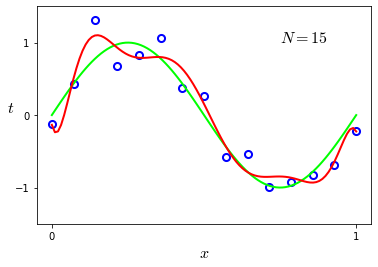

[-3.75868352e-01  2.13916629e+01 -2.78771648e+02  2.50927570e+03
 -1.24697436e+04  3.49345865e+04 -5.75227590e+04  5.53453938e+04
 -2.87973819e+04  6.25844285e+03]


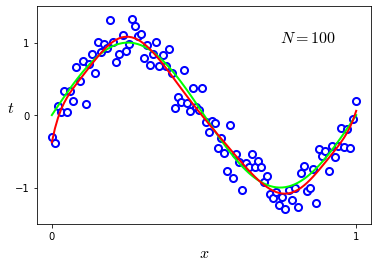

In [7]:
N = 15
x = np.linspace(0, 1, N)
y = fn(x) + np.random.normal(0, 0.2, x.shape[0])

degree = 9
fn_fit, w = poly_fit(x, y, degree)
print(w)
init_fig()
plt.scatter(x, y, s=200, c='#ffffff', marker='.', edgecolors='b', linewidths=2)
draw_fn(fn, [0, 1])
draw_fn(fn_fit, [0, 1], c="#ff0000")
plt.text(0.75, 1, "$N={}$".format(N), size=16, math_fontfamily="cm")
plt.show()

N = 100
x = np.linspace(0, 1, N)
y = fn(x) + np.random.normal(0, 0.2, x.shape[0])

degree = 9
fn_fit, w = poly_fit(x, y, degree)
print(w)
init_fig()
plt.scatter(x, y, s=200, c='#ffffff', marker='.', edgecolors='b', linewidths=2)
draw_fn(fn, [0, 1])
draw_fn(fn_fit, [0, 1], c="#ff0000")
plt.text(0.75, 1, "$N={}$".format(N), size=16, math_fontfamily="cm")
plt.show()

In order to alleviate overfitting, add regularization.
$$
\min_{\mathbf{w}} \mathcal{L} = \frac{1}{2} ||\mathbf{X}\mathbf{w}-\mathbf{y}||^2 + \frac{\lambda}{2}||\mathbf{w}||^2
$$
Let the derivative of $\mathbf{w}$ equal to $0$
$$
\begin{aligned}
    \frac{\partial \mathcal{L}}{\partial \mathbf{w}} = 0 \\
    \Rightarrow \mathbf{X}^T\mathbf{X}\mathbf{w}-\mathbf{X}^T\mathbf{y} + \lambda\mathbf{w} = 0 \\
    \Rightarrow \mathbf{w}=(\mathbf{X}^T\mathbf{X} + \lambda)^{-1}\mathbf{X}^T\mathbf{y}
\end{aligned}
$$

[-1.33986998e-01  8.06020978e+00 -1.26777306e+00 -8.67289006e+01
  1.39522747e+02 -4.43092601e+01  1.91472634e+01 -6.16423198e+01
 -9.08699569e+00  3.64390165e+01]


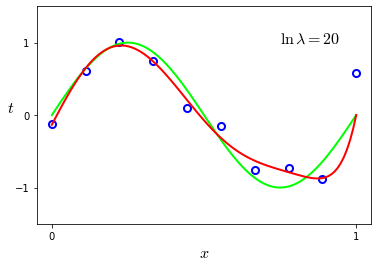

In [8]:
def least_squre_rg(X, y, lam):
    yy = y.T
    return np.linalg.inv(X.T @ X + lam) @ X.T @ yy

def poly_fit_rg(x, y, degree, lam):
    assert 0 <= degree < len(x)
    X = poly_transform(x, degree)
    w = least_squre_rg(X, y, lam)
    fn_fit = lambda x: poly_transform(x, degree) @ w
    return fn_fit, w

N = 10
x = np.linspace(0, 1, N)
y = fn(x) + np.random.normal(0, 0.2, x.shape[0])

degree = 9
log_lam = 20
lam = np.e ** log_lam
fn_fit, w = poly_fit_rg(x, y, degree, lam)
print(w)

init_fig()
plt.scatter(x, y, s=200, c='#ffffff', marker='.', edgecolors='b', linewidths=2)
draw_fn(fn, [0, 1])
draw_fn(fn_fit, [0, 1], c="#ff0000")
plt.text(0.75, 1, rf"$\ln\lambda={log_lam}$", size=16, math_fontfamily="cm")
plt.show()